<h1> Student Success Prediction using Machine learning</h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

### Read the dataset

In [2]:
data = pd.read_csv("dataset.csv", sep=";")

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.shape

(4424, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### check if the dataset has null values

In [7]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

### Count the number of every class in the output

c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


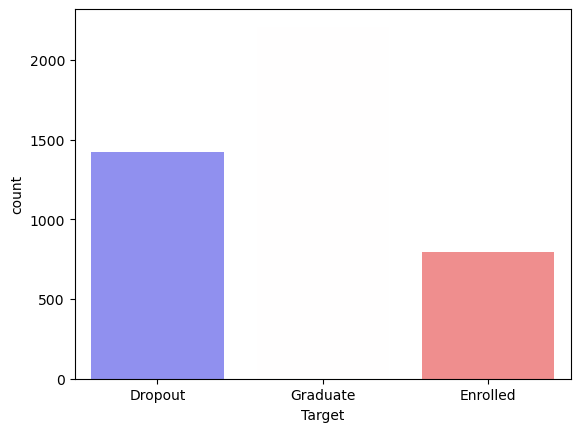

Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: Target, dtype: float64

In [8]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

### Draw the correlation between the attributes

## Convert Dropout =0, Graduate=1, Enrolled=3

In [9]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [10]:
data = data[data['Target'] != 2]

In [11]:
data.shape

(3630, 35)

### Read the input and the output

In [12]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [13]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [14]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [16]:
#Convert X to dataframe

import pandas as pd
X = pd.DataFrame(X)


In [17]:
from sklearn.feature_selection import SelectPercentile, chi2
selectPercentile= SelectPercentile(chi2, percentile=75)
X_new =selectPercentile.fit_transform(X, y)
print(X.columns[selectPercentile.get_support()].to_list())
X_new.shape

[0, 1, 2, 4, 5, 7, 10, 11, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33]


(3630, 25)

In [18]:
# prompt: need to know the importances values for the best features using SelectPercentile(chi2, percentile=80)

# Get the chi2 scores for each feature
chi2_scores = chi2(X, y)[0]

# Get the indices of the selected features
selected_feature_indices = selectPercentile.get_support(indices=True)

# Print the importance values (chi2 scores) for the selected features
for index in selected_feature_indices:
  print(f"Feature {X.columns[index]}: Importance = {chi2_scores[index]}")


Feature 0: Importance = 14.941083873043368
Feature 1: Importance = 55.47290295323821
Feature 2: Importance = 5.473834574728441
Feature 4: Importance = 2.9129417680653664
Feature 5: Importance = 24.11421136053688
Feature 7: Importance = 2.135715249566768
Feature 10: Importance = 1.2111848143657216
Feature 11: Importance = 26.03566267678078
Feature 13: Importance = 229.6927935928773
Feature 14: Importance = 95.00601905034527
Feature 15: Importance = 151.1488021215041
Feature 16: Importance = 260.72493192373895
Feature 17: Importance = 46.37353600196299
Feature 19: Importance = 3.2473205909259573
Feature 20: Importance = 3.7763633694258143
Feature 22: Importance = 94.02804279200792
Feature 23: Importance = 126.2005498079904
Feature 24: Importance = 6.027220149544966
Feature 25: Importance = 3.6880679711726136
Feature 26: Importance = 4.292925575826608
Feature 27: Importance = 3.1650218958537
Feature 28: Importance = 171.7683162185619
Feature 29: Importance = 214.39999151946805
Feature 30:

## Data splitting

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.2, random_state=10)

In [20]:
# prompt: print shapes for every varaible of train and test

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (2904, 25)
X_test shape:  (726, 25)
y_train shape:  (2904,)
y_test shape:  (726,)


## Build models

## Random forest with gridsearch


In [ ]:
# Random forest with gridsearch

import numpy as np
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1) # set verbose to a non-zero value
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Calculate the total number of fittings
num_combinations = np.prod([len(v) for v in param_grid.values()])
num_folds = grid_search.cv
total_fits = num_combinations * num_folds
print("Total number of fittings:", total_fits)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9004819277108433
Total number of fittings: 405


              precision    recall  f1-score   support

           0     0.9452    0.8449    0.8922       245
           1     0.9250    0.9751    0.9494       481

    accuracy                         0.9311       726
   macro avg     0.9351    0.9100    0.9208       726
weighted avg     0.9319    0.9311    0.9301       726



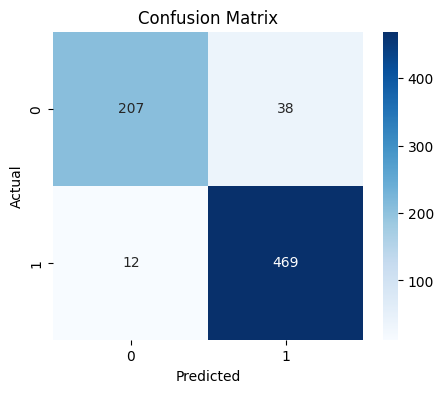

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


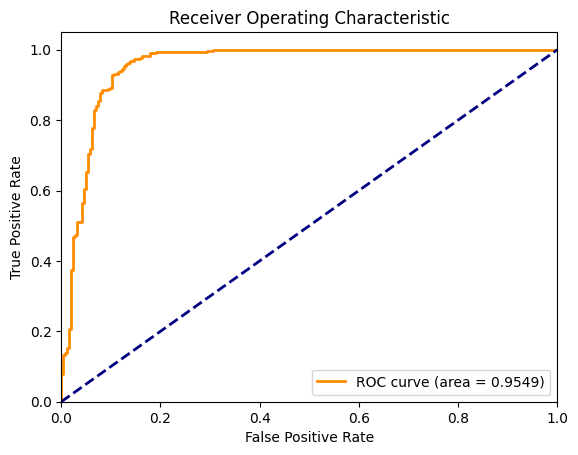

In [ ]:
#  Draw the roc curev and auc using the results of random forest

import matplotlib.pyplot as plt
# ROC Curve and AUC
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## SVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.6, 'gamma': 0.01, 'kernel': 'linear'} 0.8970383999050388


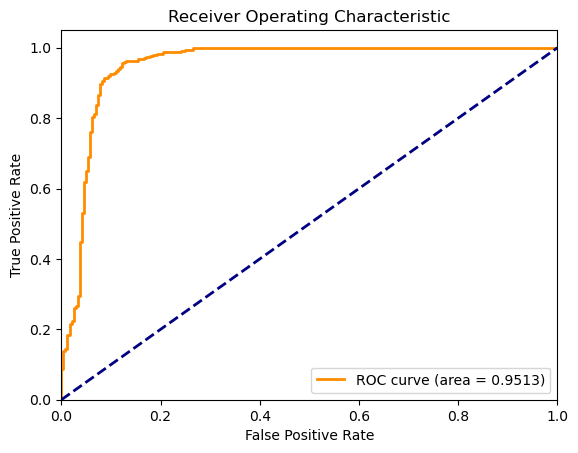

In [21]:
model = SVC(probability=True) # Set probability to True to enable predict_proba
params = {'kernel': ['linear', 'rbf'], 'C': np.arange(0.5,1,0.1), 'gamma': np.arange(0.01,0.05,0.01)}
cv_svm = GridSearchCV(model, param_grid=params, scoring="accuracy", n_jobs=-1,cv=5, verbose=2)
cv_svm.fit(X_train, y_train)
model= cv_svm.best_estimator_
y_pred=model.predict(X_test)
print(cv_svm.best_params_, cv_svm.best_score_)

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = cv_svm.predict_proba(X_test)[:, 1] # Now predict_proba should work
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Print classification report for SVC

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9207    0.8531    0.8856       245
           1     0.9279    0.9626    0.9449       481

    accuracy                         0.9256       726
   macro avg     0.9243    0.9078    0.9152       726
weighted avg     0.9254    0.9256    0.9249       726



## MLP implementation

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0     0.8826    0.8898    0.8862       245
           1     0.9436    0.9397    0.9417       481

    accuracy                         0.9229       726
   macro avg     0.9131    0.9148    0.9139       726
weighted avg     0.9230    0.9229    0.9229       726



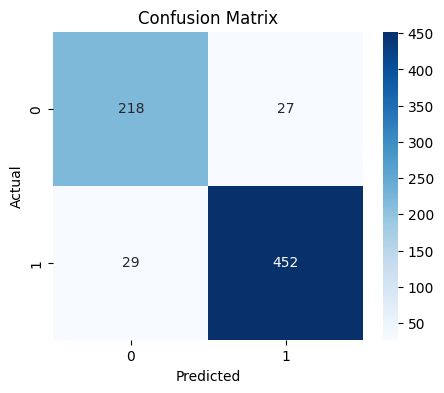

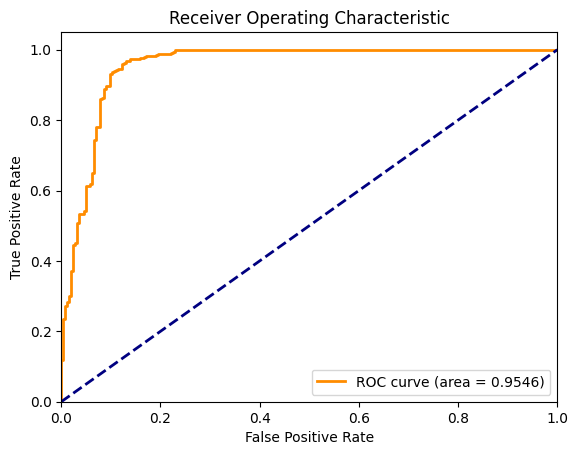

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Updated parameters with valid options
parameters = {
    "loss":["log_loss"],  # Use 'log_loss' or 'exponential'
    "learning_rate": [0.01, 0.075, 0.15],
    "min_samples_split": np.linspace(0.3, 0.5, 2),
    "min_samples_leaf": np.linspace(0.3, 0.5, 2),
    "max_depth":[8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse", "squared_error"],  # Use valid options
    "subsample":[ 0.75, 0.95],
    "n_estimators":[10]
}

#passing the scoring function in the GridSearchCV
clf_GB = GridSearchCV(GradientBoostingClassifier(), parameters,cv=5, n_jobs=-1, verbose=1)

clf_GB.fit(X_train, y_train)
y_pred=clf_GB.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


              precision    recall  f1-score   support

           0     0.8100    0.7306    0.7682       245
           1     0.8693    0.9127    0.8905       481

    accuracy                         0.8512       726
   macro avg     0.8396    0.8216    0.8294       726
weighted avg     0.8493    0.8512    0.8492       726



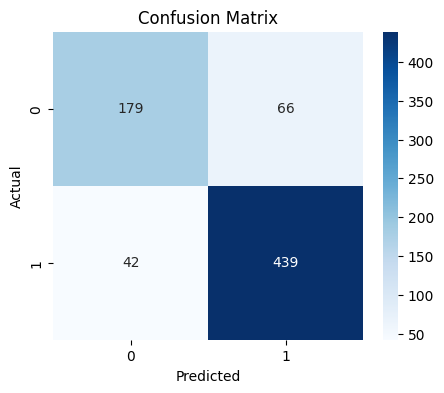

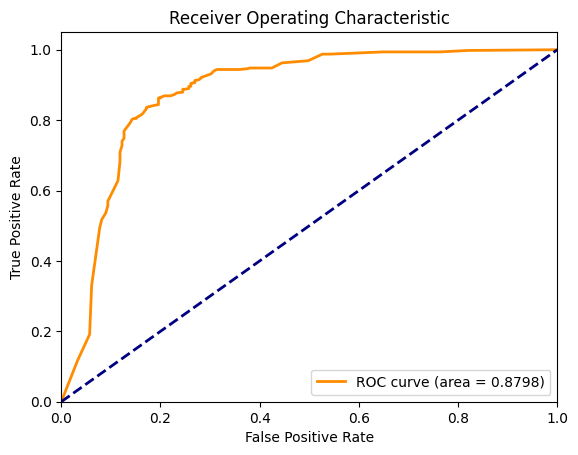

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = clf_GB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Voting Classier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


eclf = VotingClassifier(estimators=[
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='soft')

#Use the key for the classifier followed by __ and the attribute
params = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}

grid_VC = GridSearchCV(estimator=eclf, param_grid=params, cv=5,n_jobs=-1, verbose=3)

grid_VC.fit(X_train,y_train)
print (grid_VC.best_params_)

y_pred=grid_VC.predict(X_test)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'lr__C': 100.0, 'svm__C': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.9422    0.8653    0.9021       245
           1     0.9341    0.9730    0.9532       481

    accuracy                         0.9366       726
   macro avg     0.9382    0.9191    0.9276       726
weighted avg     0.9369    0.9366    0.9359       726



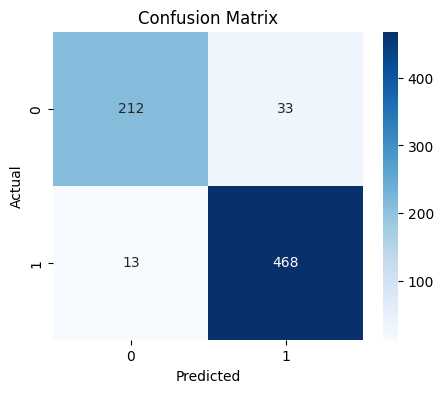

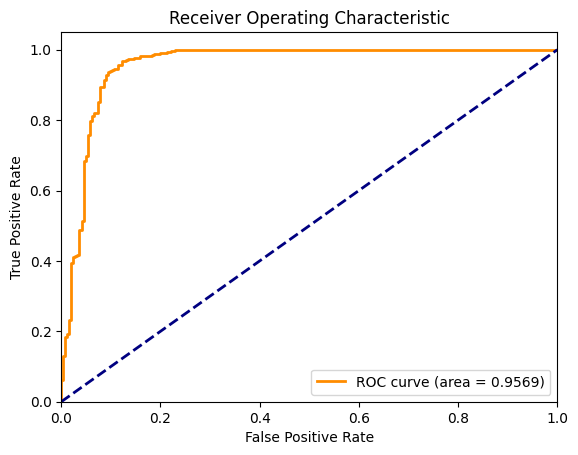

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = grid_VC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Linear_SGD classifier

In [ ]:
# Implementing Linear_SGD classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, loss='log_loss') # Change loss to 'log' for probability estimates
Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha': Cs}]
grid_SGD = GridSearchCV(clf, tuned_parameters, scoring = 'accuracy', cv=5,n_jobs=-1, verbose=3)
grid_SGD.fit(X_train, y_train)
y_pred=grid_SGD.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


              precision    recall  f1-score   support

           0     0.9845    0.7755    0.8676       245
           1     0.8968    0.9938    0.9428       481

    accuracy                         0.9201       726
   macro avg     0.9406    0.8846    0.9052       726
weighted avg     0.9264    0.9201    0.9174       726



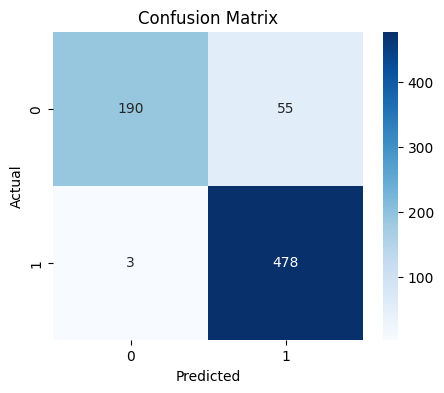

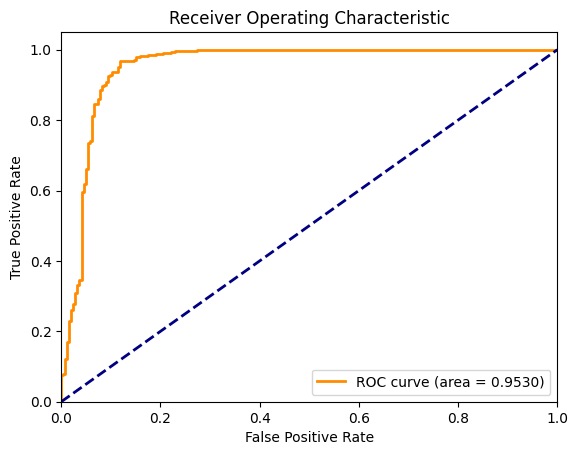

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = grid_SGD.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc_params = {"base_estimator__max_depth": [10,20],
          "base_estimator__max_features": ["sqrt"], # Changed 'auto' to 'sqrt'
          "base_estimator__min_samples_leaf": [3, 7, 10],
          "base_estimator__min_samples_split": [5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=1)
bc_gs.fit(X_train, y_train)
y_pred=bc_gs.predict(X_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/usr/local/lib/python3.10/dist-

              precision    recall  f1-score   support

           0     0.9251    0.8571    0.8898       245
           1     0.9299    0.9647    0.9469       481

    accuracy                         0.9284       726
   macro avg     0.9275    0.9109    0.9184       726
weighted avg     0.9283    0.9284    0.9277       726



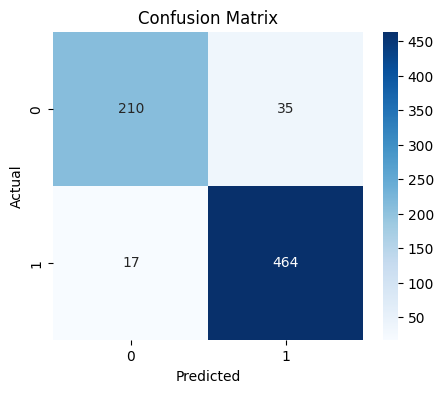

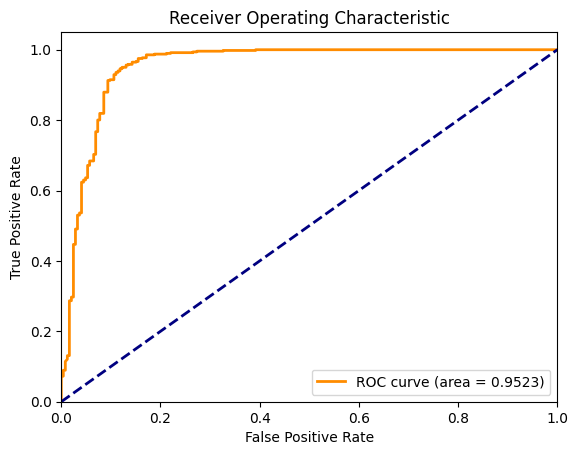

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = bc_gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Stacking Classifier

**Base Models (Level-0 Models):**

Train multiple base models on the training data.
Each base model makes predictions on the training data and often on a hold-out validation set to avoid overfitting.
The predictions from these base models are collected and used as new features for the next level.

**Meta-Model (Level-1 Model):**

Train a meta-model on the predictions made by the base models.
The meta-model learns how to combine the base model predictions to make the final prediction.

**Making Predictions:**

To make a prediction on new data, first, the base models make their predictions.
These predictions are then fed into the meta-model, which outputs the final prediction.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

# define the base models
level0 = list()
level0.append(('LR', LogisticRegression(C= 0.1, penalty='l2')))
level0.append(('RF',RandomForestClassifier(n_estimators= 300)))
level0.append(('DT', DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random')))
level0.append(('SGD',SGDClassifier(alpha= 0.01)))
level0.append(('XGB',XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5, gamma= 1, colsample_bytree= 0.8)))
level0.append(('MLP',MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'adam')))
level0.append(('Adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))
level0.append(('bagging',BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))

# define meta learner model
level1= SVC(C= 0.7999999999999999, gamma= 0.04, kernel= 'rbf')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) r

              precision    recall  f1-score   support

           0     0.9583    0.8449    0.8980       245
           1     0.9255    0.9813    0.9526       481

    accuracy                         0.9353       726
   macro avg     0.9419    0.9131    0.9253       726
weighted avg     0.9366    0.9353    0.9342       726



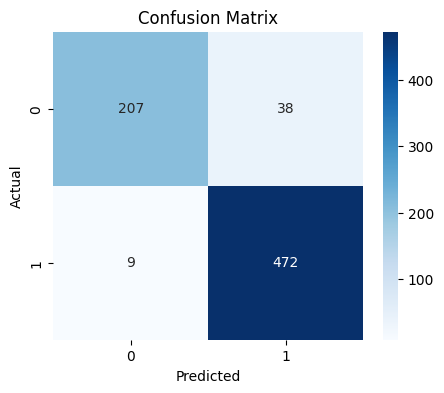

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

